# Complex Machine Learning Datasets

---

- Author: Quan Nguyen

---


# Dataset  and Machine Learning Model overview

- Data source: [Metabolic Syndrome](https://data.world/informatics-edu/metabolic-syndrome-prediction)  
- The dataset for analysis came from the NHANES initiative where the following variables were combined from multiple tables with SQL: abnormal waist circumference, triglycerides above 150, HDL cholesterol below 50 in women or 40 in men, history of hypertension and mildly elevated fasting blood sugar (100-125). Numerous other variables were added, such as uric acid, race, income, etc. that might contribute to the model but we will not sure, until we test the model.
- The target of this dataset is to predict the diagnosis of metabolic syndrome.
- One row represents a patient's info 
- This is a classification problem

In [1]:
#pandas
import pandas as pd
#numpy
import numpy as np 
#matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns

#Sklearn
    ##Preprocessing
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer, make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
    ##Modeling
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.pipeline import make_pipeline as imblearn_pipe
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
    ##Clustering
from sklearn.cluster import KMeans, AgglomerativeClustering
    ##PCA
from sklearn.decomposition import PCA
#Classification Metrics
from sklearn.metrics import ( ConfusionMatrixDisplay, 
                             PrecisionRecallDisplay, 
                             f1_score, accuracy_score, precision_score,
                             recall_score, classification_report)
#Warning
import warnings
warnings.filterwarnings("ignore")

C:\Users\black\anaconda3\envs\dojo-env\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
ms = pd.read_csv("D:\Lesson\Stack 3\Metabolic  Syndrome (1).csv")
ms.head()

seqn  Age     Sex  Marital  Income   Race  WaistCirc   BMI  Albuminuria  \
0  62161   22    Male   Single  8200.0  White       81.0  23.3            0   
1  62164   44  Female  Married  4500.0  White       80.1  23.2            0   
2  62169   21    Male   Single   800.0  Asian       69.6  20.1            0   
3  62172   43  Female   Single  2000.0  Black      120.4  33.3            0   
4  62177   51    Male  Married     NaN  Asian       81.1  20.1            0   

   UrAlbCr  UricAcid  BloodGlucose  HDL  Triglycerides MetabolicSyndrome  
0     3.88       4.9            92   41             84         No MetSyn  
1     8.55       4.5            82   28             56         No MetSyn  
2     5.07       5.4           107   43             78         No MetSyn  
3     5.22       5.0           104   73            141         No MetSyn  
4     8.13       5.0            95   43            126         No MetSyn

In [3]:
print(f"There is {ms.shape[0]} rows, and {ms.shape[1]} columns in the data")

There is 2401 rows, and 15 columns in the data


## Data Cleaning

### Delete Unneccesary Columns

In [4]:
ms['seqn'].nunique()

2401

this columns has all different values it might be the identifying number of a patient, so we will drop this column.

In [5]:
ms.drop(columns=['seqn'], inplace=True)

### Delete Duplicated Rows

In [6]:
print(f'The dataset has {ms.duplicated().sum()} duplicated values')

The dataset has 0 duplicated values


### Handling missing value

In [7]:
ms.isna().sum()

Age                    0
Sex                    0
Marital              208
Income               117
Race                   0
WaistCirc             85
BMI                   26
Albuminuria            0
UrAlbCr                0
UricAcid               0
BloodGlucose           0
HDL                    0
Triglycerides          0
MetabolicSyndrome      0
dtype: int64

In [8]:
print(f'the data set has {ms.isna().sum().sum()} missing values')

the data set has 436 missing values


In [9]:
ms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2401 entries, 0 to 2400
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                2401 non-null   int64  
 1   Sex                2401 non-null   object 
 2   Marital            2193 non-null   object 
 3   Income             2284 non-null   float64
 4   Race               2401 non-null   object 
 5   WaistCirc          2316 non-null   float64
 6   BMI                2375 non-null   float64
 7   Albuminuria        2401 non-null   int64  
 8   UrAlbCr            2401 non-null   float64
 9   UricAcid           2401 non-null   float64
 10  BloodGlucose       2401 non-null   int64  
 11  HDL                2401 non-null   int64  
 12  Triglycerides      2401 non-null   int64  
 13  MetabolicSyndrome  2401 non-null   object 
dtypes: float64(5), int64(5), object(4)
memory usage: 262.7+ KB


In [10]:
#convert columns names to lower case to make them easier to remember
ms.columns = ms.columns.str.lower()
ms.columns


Index(['age', 'sex', 'marital', 'income', 'race', 'waistcirc', 'bmi',
       'albuminuria', 'uralbcr', 'uricacid', 'bloodglucose', 'hdl',
       'triglycerides', 'metabolicsyndrome'],
      dtype='object')

***There is no missing values on our target***

> We will not handle missing value because when we split the data set and train the data we will use onehotencoder and simple imputer to handle these missing values

### Checking inconsistency of the values

In [11]:
ms.describe(include='number')

age       income    waistcirc          bmi  albuminuria  \
count  2401.000000  2284.000000  2316.000000  2375.000000  2401.000000   
mean     48.691795  4005.253940    98.307254    28.702189     0.154102   
std      17.632852  2954.032186    16.252634     6.662242     0.422780   
min      20.000000   300.000000    56.200000    13.400000     0.000000   
25%      34.000000  1600.000000    86.675000    24.000000     0.000000   
50%      48.000000  2500.000000    97.000000    27.700000     0.000000   
75%      63.000000  6200.000000   107.625000    32.100000     0.000000   
max      80.000000  9000.000000   176.000000    68.700000     2.000000   

           uralbcr     uricacid  bloodglucose          hdl  triglycerides  
count  2401.000000  2401.000000   2401.000000  2401.000000    2401.000000  
mean     43.626131     5.489046    108.247813    53.369429     128.125364  
std     258.272829     1.439358     34.820657    15.185537      95.322477  
min       1.400000     1.800000     39.000000    14.000000      26.000000  
25%       4.450000     4.500000     92.000000    43.000000      75.000000  
50%       7.070000     5.400000     99.000000    51.000000     103.000000  
75%      13.690000     6.400000    110.000000    62.000000     150.000000  
max    5928.000000    11.300000    382.000000   156.000000    1562.000000

In [12]:
ms['albuminuria'].value_counts()

0    2089
1     254
2      58
Name: albuminuria, dtype: int64

this column should be ordinal, so we have to change it to categorical type

In [13]:
ms['albuminuria'] = ms['albuminuria'].astype('object')

In [14]:
ms.describe(include='object')

sex  marital   race  albuminuria metabolicsyndrome
count     2401     2193   2401         2401              2401
unique       2        5      6            3                 2
top     Female  Married  White            0         No MetSyn
freq      1211     1192    933         2089              1579

In [15]:
ms['marital'].value_counts(normalize= True)

Married      0.543548
Single       0.227086
Divorced     0.110351
Widowed      0.075695
Separated    0.043320
Name: marital, dtype: float64

In [16]:
ms['race'].value_counts(normalize= True)
# Note: Since other appears less than 3% of the time, then we will delete it
ms = ms.drop(ms[ms['race'] == 'Other'].index)

In [17]:
ms['sex'].value_counts(normalize= True)

Female    0.504274
Male      0.495726
Name: sex, dtype: float64

In [18]:
ms['albuminuria'].value_counts(normalize= True)
# since 2 is appears less than 3% of the time, then we will delete it
ms = ms.drop(ms[ms['albuminuria'] == '2'].index)

***There is no inconsistencies value being detected***

## Data Visualization

### EDA for numerical columns

In [19]:
def boxplot(df, col):
    fig, ax = plt.subplots(figsize = (8, 4))
    sns.boxplot(data=df, x=col)
    ax.set_title("Boxplot of {}".format(col), fontweight='bold')
    ax.set_xlabel('Values')
    ax.set_ylabel(col)
    plt.show();

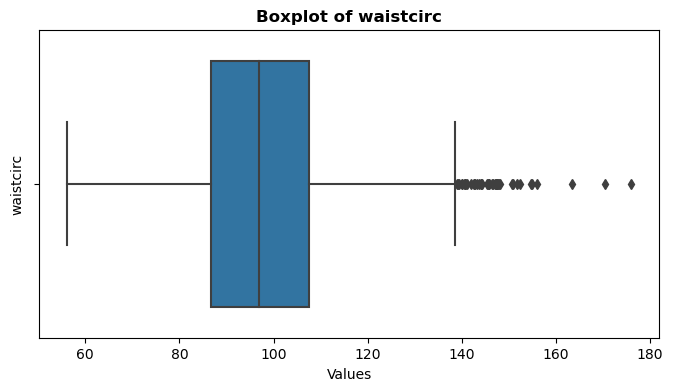

In [20]:
boxplot(ms, 'waistcirc')

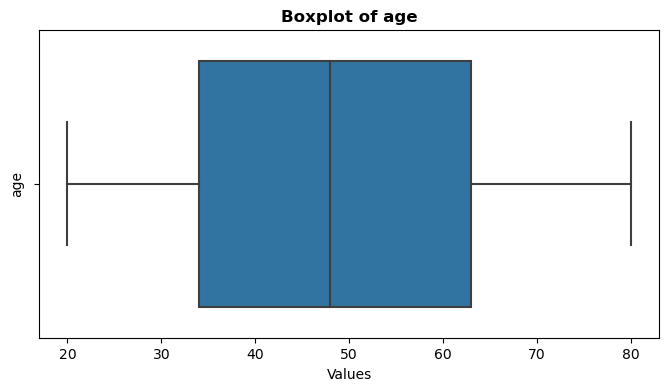

In [21]:
boxplot(ms, 'age')

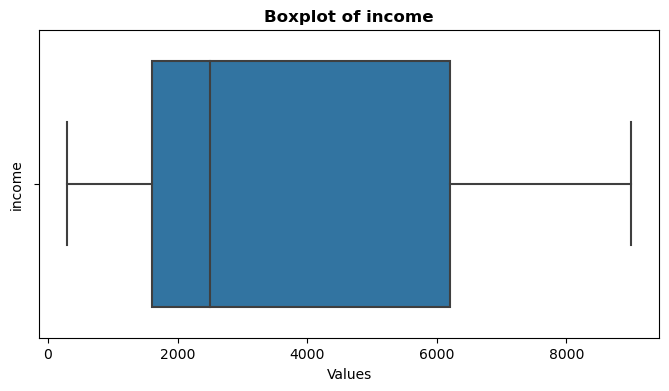

In [22]:
boxplot(ms, 'income')

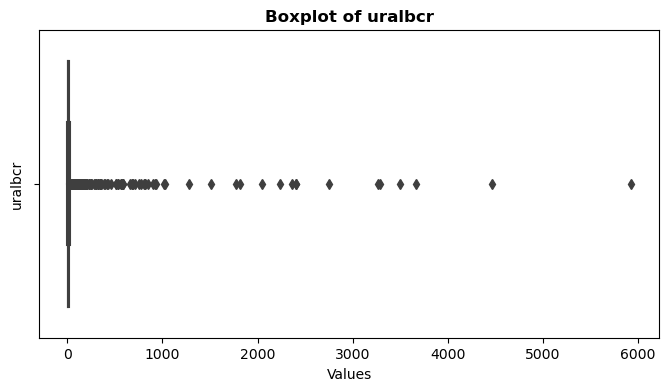

In [23]:
boxplot(ms, 'uralbcr')

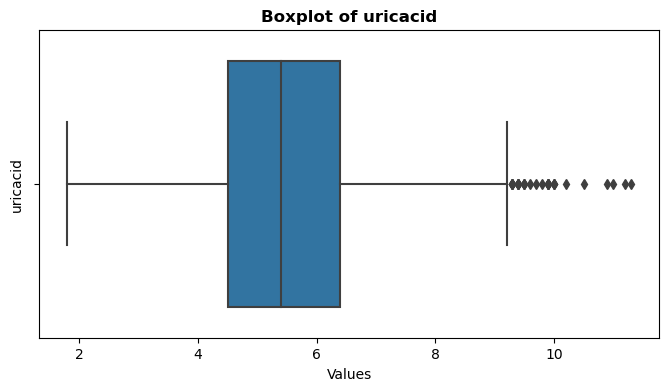

In [24]:
boxplot(ms, 'uricacid')

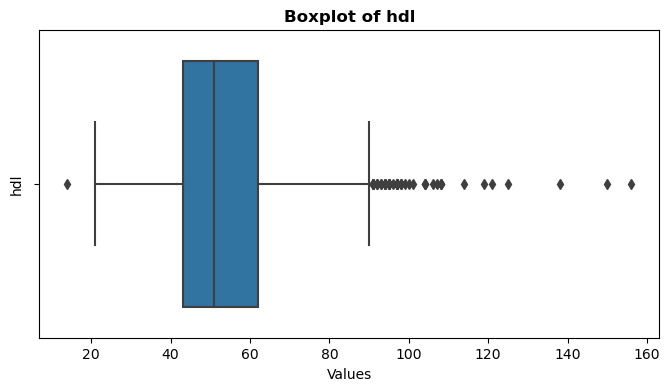

In [25]:
boxplot(ms, 'hdl')

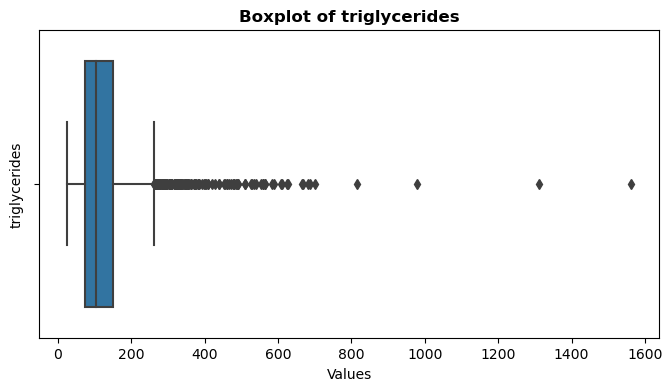

In [26]:
boxplot(ms, 'triglycerides')

We have many outliers from the medical dataset so we will not remove these outliers as it will affect the prediction process

### EDA for target and features

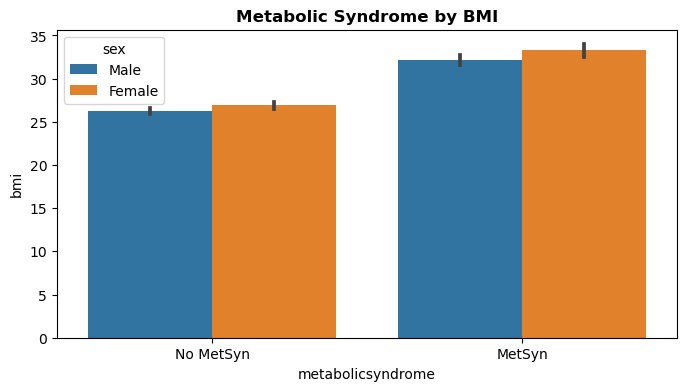

In [27]:
fig,ax = plt.subplots(figsize = (8, 4))
sns.barplot(x=ms['metabolicsyndrome'], y=ms['bmi'], hue=ms['sex'], ax=ax,
            data=ms);
ax.set_title('Metabolic Syndrome by BMI', fontweight='bold');

- We can see that woman asymptomatic to metabolic syndrome more than man.
- we can also see that people with high bmi are tend to be asymptomatic to metabolic syndrome

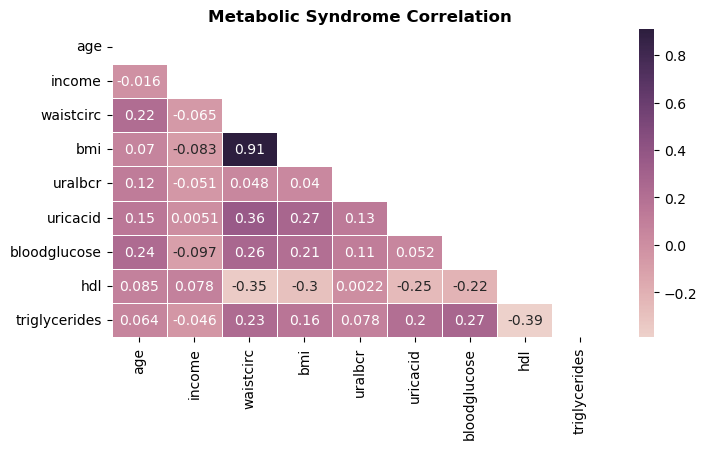

In [28]:
# To get a triangle correlation map and hide duplicate values as well as the diagonal of all the values with themselves, use the mask argument
# We will first define the area to be masked (blocked)
# np.ones_like(corr) creates an array of all 1s of the same shape as the corr dataframe we just made
# np.triu() will just return the upper triangle of any array 
# by masking (blocking) the upper triangle in our heatmap, we are left with only the lower triangle
mask = np.triu(np.ones_like(ms.corr()))
fig, ax = plt.subplots(figsize = (8, 4))
sns.heatmap(ms.corr(), cmap=sns.cubehelix_palette(as_cmap=True), annot = True, mask = mask,linewidth=.7);
ax.set_title('Metabolic Syndrome Correlation', fontweight='bold');

- Mathematically, we can see the strong correlation between bmi and waist circumference columns, this implies a fact that if a person have high bmi relative their waist circumference will be high. This also apply to age vs waist circumference. 
- We can see the other strong relationship between waist circumference vs uricacid and bloodglucose level.

In [29]:
def scatter_plot(df, y, x):
  # Calculate the correlation
  figsize=(6,4)
  corr = df[[x,y]].corr().round(2)
  r = corr.loc[x,y]
  # Plot the data
  fig, ax = plt.subplots(figsize=figsize)
  scatter_kws={'ec':'white','lw':1,'alpha':0.8}
  sns.regplot(data=df, x=x, y=y, ax=ax, scatter_kws=scatter_kws)
  ## Add the title with the correlation
  # Set the title at the bottom
  ax.set_title("")  # Clear the default title
  ax.text(0.5, -0.20, f"Scatter Plot of {x} vs. {y} (r = {r})", fontweight='bold', ha='center', transform=ax.transAxes)

  # Make sure the plot is shown before the print statement
  plt.show();

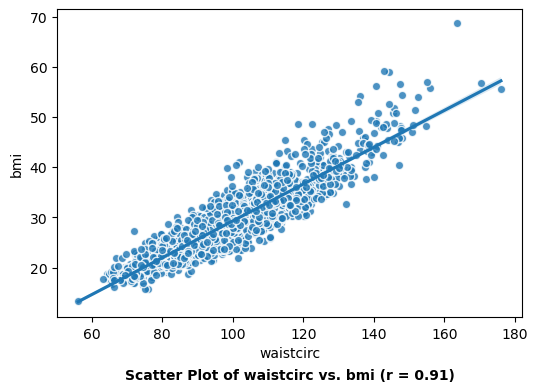

In [30]:
scatter_plot(ms, 'bmi', 'waistcirc');

- There is a strong relation between bmi and the waist circumference which is very obvious, so we would not choose this one to recommend for our stakeholders.

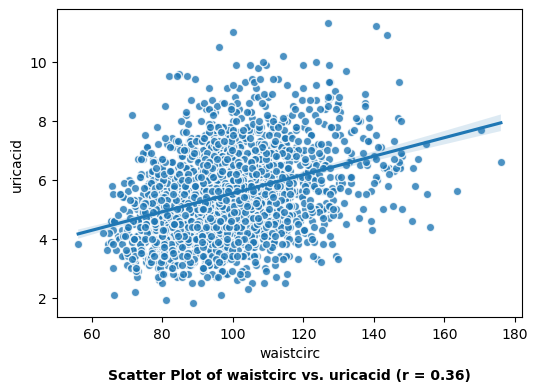

In [31]:
scatter_plot(ms,'uricacid', 'waistcirc');

- This strong correlation shows that the Waist circumference is correlated to the uric acid that found in our blood, so we can choose this correlation to recommend for stakeholders that patient can easily get hyperuricemia a.k.a gout when being overweight.

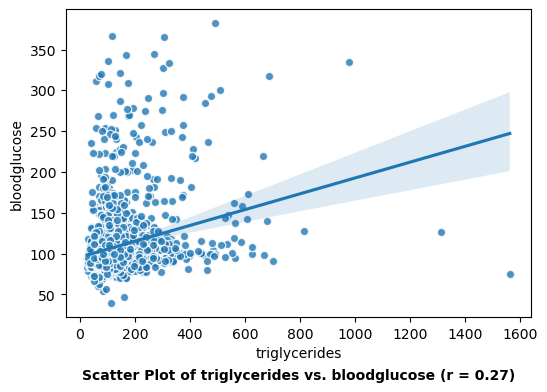

In [32]:
scatter_plot(ms, 'bloodglucose', 'triglycerides');

- The correlation coefficient (r = 0.27) suggests a weak positive relationship between these two. Recognize that there might be other variables influencing the relationship between triglycerides and blood glucose. For example, factors like diet, physical activity, medication use, and underlying health conditions can affect both triglyceride and blood glucose levels. It's important to account for these variables and their potential impact on the relationship.

## Preprocessing

In [33]:
ms.head()

age     sex  marital  income   race  waistcirc   bmi albuminuria  uralbcr  \
0   22    Male   Single  8200.0  White       81.0  23.3           0     3.88   
1   44  Female  Married  4500.0  White       80.1  23.2           0     8.55   
2   21    Male   Single   800.0  Asian       69.6  20.1           0     5.07   
3   43  Female   Single  2000.0  Black      120.4  33.3           0     5.22   
4   51    Male  Married     NaN  Asian       81.1  20.1           0     8.13   

   uricacid  bloodglucose  hdl  triglycerides metabolicsyndrome  
0       4.9            92   41             84         No MetSyn  
1       4.5            82   28             56         No MetSyn  
2       5.4           107   43             78         No MetSyn  
3       5.0           104   73            141         No MetSyn  
4       5.0            95   43            126         No MetSyn

In [34]:
ms.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2340 entries, 0 to 2400
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                2340 non-null   int64  
 1   sex                2340 non-null   object 
 2   marital            2138 non-null   object 
 3   income             2226 non-null   float64
 4   race               2340 non-null   object 
 5   waistcirc          2257 non-null   float64
 6   bmi                2314 non-null   float64
 7   albuminuria        2340 non-null   object 
 8   uralbcr            2340 non-null   float64
 9   uricacid           2340 non-null   float64
 10  bloodglucose       2340 non-null   int64  
 11  hdl                2340 non-null   int64  
 12  triglycerides      2340 non-null   int64  
 13  metabolicsyndrome  2340 non-null   object 
dtypes: float64(5), int64(4), object(5)
memory usage: 274.2+ KB


In [35]:
#Create another copy for clustering 
ms2 = ms.copy()

In [36]:
#Create a train/test split dataset
X = ms.drop(columns=['metabolicsyndrome']).copy()
y = ms['metabolicsyndrome'].copy()
#mapping target values to 0 and 1
target_map ={'No MetSyn':0, 'MetSyn':1}
y = y.map(target_map)
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

### Numerical Columns

In [37]:
#We will use simpleimputer to impute missing values with mean
mean_imputer = SimpleImputer(strategy ='mean')
scaler = StandardScaler()
#pipeline
num_pipeline = make_pipeline(scaler, mean_imputer)
#numerically select columns
num_selector = make_column_selector(dtype_include='number')
#numerical tuple
num_tuple = (num_pipeline, num_selector)

### Categorical Columns

In [38]:
#We will use one hot encoder to encode categorical variables 
#handling missing values with most frequent values
freq_imputer = SimpleImputer(strategy = 'most_frequent')
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')
#pipeline
cat_pipeline = make_pipeline(freq_imputer, ohe)
#categorical columns selector
cat_cols = make_column_selector(dtype_include='object')
#categorical tuple
cat_tuple = (cat_pipeline, cat_cols)

In [39]:
#Columns transformation
preprocessor = make_column_transformer(num_tuple, cat_tuple, remainder='drop')

## Machine Learning Model (Classification)

In [40]:
def make_class_scores_df(y_train, y_test, train_preds, test_preds, 
                         average='macro', name='Classification Model',
                         zero_division=0):
  scores = pd.DataFrame()
  #Training
  scores.loc[name, 'Train Accuracy'] = accuracy_score(y_train, train_preds)
  scores.loc[name, 'Train Recall'] = recall_score(y_train, train_preds,
                                                           average=average,
                                                       zero_division=zero_division)
  scores.loc[name, 'Train Precision'] = precision_score(y_train, train_preds,
                                                           average=average,
                                                      zero_division=zero_division)
  scores.loc[name, 'Train F1-Score'] = f1_score(y_train, train_preds,
                                                           average=average,
                                                     zero_division=zero_division)
  
  # Testing
  scores.loc[name, 'Test Accuracy'] = accuracy_score(y_test, test_preds)
  scores.loc[name, 'Test Recall'] = recall_score(y_test, test_preds,
                                                           average=average,
                                                      zero_division=zero_division)
  scores.loc[name, 'Test Precision'] = precision_score(y_test, test_preds,
                                                           average=average,
                                                      zero_division=zero_division)
  scores.loc[name, 'Test F1-Score'] = f1_score(y_test, test_preds,
                                                           average=average,
                                                     zero_division=zero_division)

  return scores

## Define a function that takes in arguments and prints out a classification report and confusion matrix
def evaluate_classification(model, X_train, y_train, X_test, y_test,
                            cmap='Greens', normalize=None, 
                            figsize=(20,5), name='Classification Model', 
                            average='macro', zero_division=0):
  classes ={'No MetSyn', 'MetSyn'}
  # Gather model predictions
  train_preds = model.predict(X_train)
  test_preds = model.predict(X_test)

  # Display classification report and confusion matrices
  print('======Train Set Metrics======')
  print(classification_report(y_train, train_preds, 
                                      zero_division=0,
                                      target_names=classes))
  
  print('======Test Set Metrics======')
  print(classification_report(y_test, test_preds, 
                                      zero_division=0,
                                      target_names=classes))

  fig, axes = plt.subplots(ncols=2, figsize=figsize)

  ConfusionMatrixDisplay.from_estimator(model, X_train, y_train, cmap=cmap, 
                                display_labels=classes,
                                normalize=normalize, ax=axes[0])
  axes[0].set_title('Train Confusion Matrix')

  ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap=cmap, 
                              display_labels=classes,
                              normalize=normalize, ax=axes[1])
  axes[1].set_title('Test Confusion Matrix')
  plt.show()

  scores_df = make_class_scores_df(y_train, y_test, train_preds, test_preds, 
                                   average=average, name=name,
                                   zero_division=zero_division)
  #Create global dataframe to stores all the scores
  global scores_df_concat
  scores_df_concat = pd.concat([scores_df_concat, scores_df])

  return scores_df_concat


### KNearestNeighbors Classifier

In [41]:
#Create a global variable to store all the metrics scores
scores_df_concat = pd.DataFrame()

In [42]:
#Creat KNN pipeline
knn = KNeighborsClassifier()
knn_pipe = make_pipeline(preprocessor, knn)
knn_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler()),
                                                                  ('simpleimputer',
                                                                   SimpleImputer())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001BE5B3AF220>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001BE5B366820>)])),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [43]:
#getting model predictions
train_knn_pred = knn_pipe.predict(X_train)
test_knn_pred = knn_pipe.predict(X_test)

======Train Set Metrics======
              precision    recall  f1-score   support

      MetSyn       0.87      0.93      0.90      1132
   No MetSyn       0.85      0.75      0.80       623

    accuracy                           0.87      1755
   macro avg       0.86      0.84      0.85      1755
weighted avg       0.86      0.87      0.86      1755

======Test Set Metrics======
              precision    recall  f1-score   support

      MetSyn       0.85      0.89      0.87       403
   No MetSyn       0.73      0.66      0.70       182

    accuracy                           0.82       585
   macro avg       0.79      0.78      0.78       585
weighted avg       0.82      0.82      0.82       585



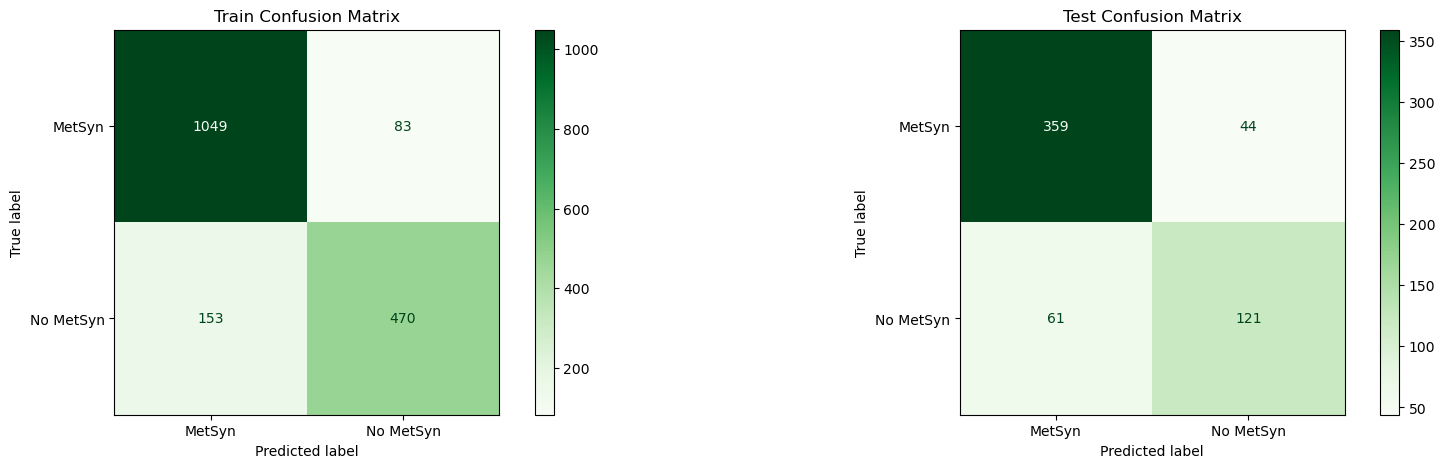

Train Accuracy  Train Recall  Train Precision  Train F1-Score  \
KNN Classifier        0.865527      0.840546         0.861311        0.849103   

                Test Accuracy  Test Recall  Test Precision  Test F1-Score  
KNN Classifier       0.820513     0.777827        0.794048       0.784912

In [44]:
evaluate_classification(knn_pipe, X_train, y_train, X_test, y_test,
                            cmap='Greens', normalize=None, 
                            figsize=(20,5), name='KNN Classifier', 
                            average='macro', zero_division=0)

### Tune up model with GridSearch CV

In [45]:
#creating function for GridSearchCV
def Grid_Search(model,X_train, y_train, X_test, y_test, params, lbl = ''):
  global scores_df_concat  # Access the global scores_df_concat
  #Creating GridSearchCV pipeline
  model_gs = GridSearchCV(model, params)
  #Fitting model
  model_gs.fit(X_train,y_train)
  #Getting best params for model
  best_params = model_gs.best_params_
  #Getting best f1-score for model
  best_score = model_gs.best_score_
  #Applied best estimator for the model and computing classification reports for
  ##the best model
  best_model = model_gs.best_estimator_
  print('Best parameters of the model', best_params)
  print('Best F1-score of the model', best_score)
  scores_df_concat = evaluate_classification(best_model, X_train, y_train, X_test, y_test,
                            cmap='Greens', normalize=None, 
                            figsize=(20,5), name=lbl, 
                            average='macro', zero_division=0)
  return scores_df_concat

In [46]:
knn_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('pipeline-1',
                                    Pipeline(steps=[('standardscaler',
                                                     StandardScaler()),
                                                    ('simpleimputer',
                                                     SimpleImputer())]),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x000001BE5B3AF220>),
                                   ('pipeline-2',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(strategy='most_frequent')),
                                                    ('onehotencoder',
                                                     OneHotEncoder(handle_unknown='ignore',
                                                                   sparse=False))]),
                          

In [47]:
knn_param = {'kneighborsclassifier__weights': ['uniform', 'distance'],
             'kneighborsclassifier__n_neighbors': range(1,15)}

Best parameters of the model {'kneighborsclassifier__n_neighbors': 11, 'kneighborsclassifier__weights': 'uniform'}
Best F1-score of the model 0.8165242165242166
======Train Set Metrics======
              precision    recall  f1-score   support

      MetSyn       0.85      0.94      0.89      1132
   No MetSyn       0.86      0.70      0.77       623

    accuracy                           0.85      1755
   macro avg       0.86      0.82      0.83      1755
weighted avg       0.85      0.85      0.85      1755

======Test Set Metrics======
              precision    recall  f1-score   support

      MetSyn       0.85      0.89      0.87       403
   No MetSyn       0.73      0.65      0.69       182

    accuracy                           0.82       585
   macro avg       0.79      0.77      0.78       585
weighted avg       0.81      0.82      0.81       585



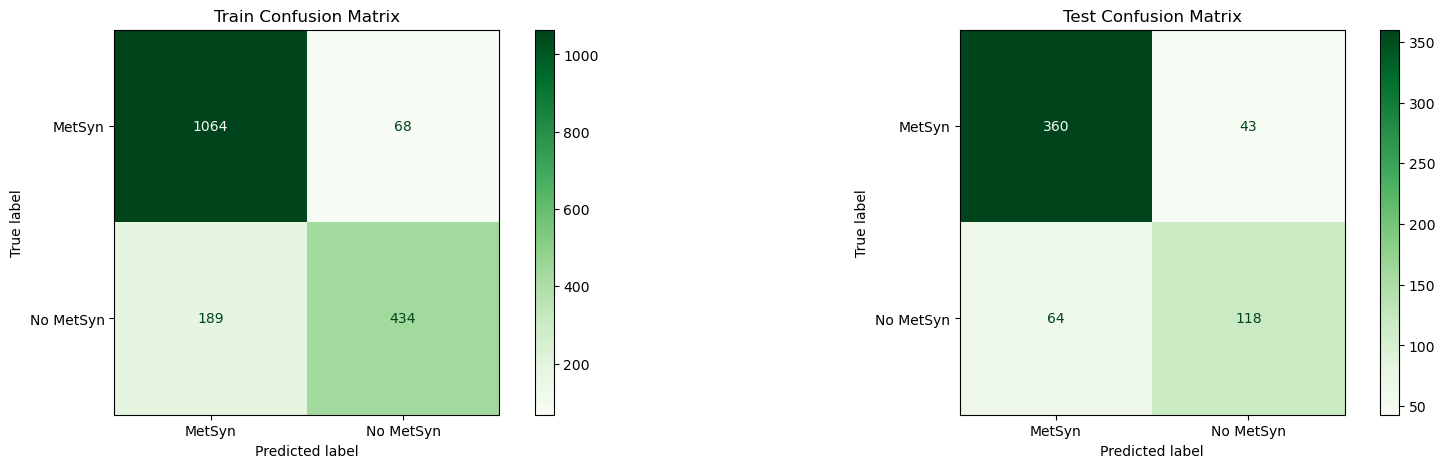

Train Accuracy  Train Recall  Train Precision  Train F1-Score  \
KNN Classifier        0.865527      0.840546         0.861311        0.849103   
KNN Best Model        0.853561      0.818279         0.856852        0.831899   

                Test Accuracy  Test Recall  Test Precision  Test F1-Score  
KNN Classifier       0.820513     0.777827        0.794048       0.784912  
KNN Best Model       0.817094     0.770826        0.790988       0.779332

In [48]:
Grid_Search(knn_pipe,X_train, y_train, X_test, y_test, knn_param, lbl = 'KNN Best Model')

### Light GBM

In [49]:
lgbm = LGBMClassifier()
lgbm_pipe = make_pipeline(preprocessor, lgbm)
lgbm_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler()),
                                                                  ('simpleimputer',
                                                                   SimpleImputer())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001BE5B3AF220>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001BE5B366820>)])),
                ('lgbmclassifier', LGBMClassifier())])

======Train Set Metrics======
              precision    recall  f1-score   support

      MetSyn       1.00      1.00      1.00      1132
   No MetSyn       1.00      1.00      1.00       623

    accuracy                           1.00      1755
   macro avg       1.00      1.00      1.00      1755
weighted avg       1.00      1.00      1.00      1755

======Test Set Metrics======
              precision    recall  f1-score   support

      MetSyn       0.93      0.94      0.93       403
   No MetSyn       0.85      0.84      0.84       182

    accuracy                           0.90       585
   macro avg       0.89      0.89      0.89       585
weighted avg       0.90      0.90      0.90       585



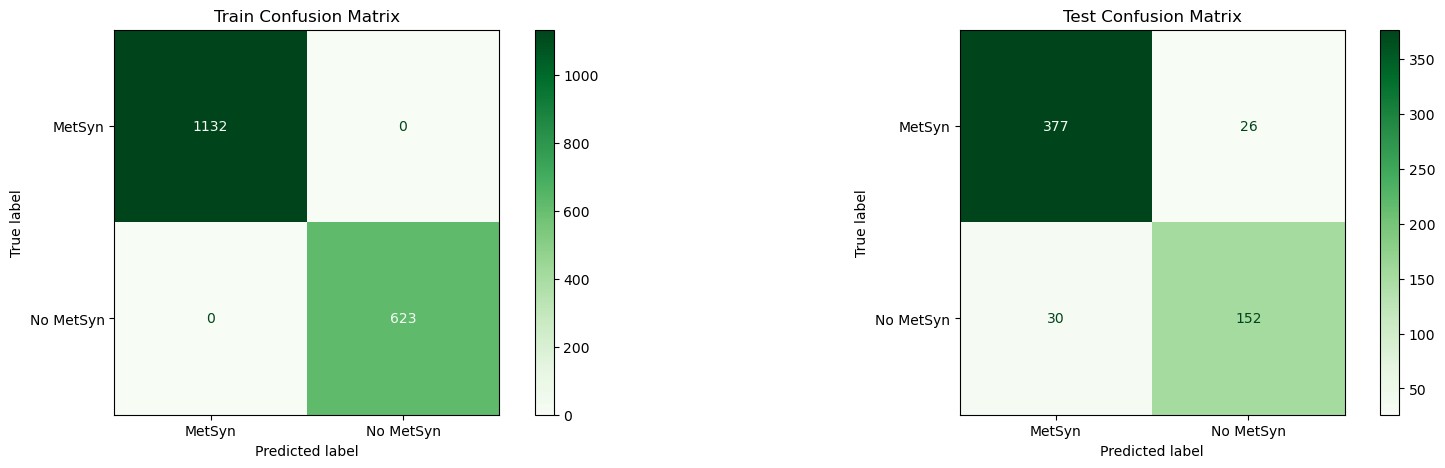

Train Accuracy  Train Recall  Train Precision  \
KNN Classifier             0.865527      0.840546         0.861311   
KNN Best Model             0.853561      0.818279         0.856852   
LightGBM Classifier        1.000000      1.000000         1.000000   

                     Train F1-Score  Test Accuracy  Test Recall  \
KNN Classifier             0.849103       0.820513     0.777827   
KNN Best Model             0.831899       0.817094     0.770826   
LightGBM Classifier        1.000000       0.904274     0.885324   

                     Test Precision  Test F1-Score  
KNN Classifier             0.794048       0.784912  
KNN Best Model             0.790988       0.779332  
LightGBM Classifier        0.890111       0.887654

In [50]:
evaluate_classification(lgbm_pipe, X_train, y_train, X_test, y_test,
                            cmap='Greens', normalize=None, 
                            figsize=(20,5), name='LightGBM Classifier', 
                            average='macro', zero_division=0)

In [51]:
lgbm_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('pipeline-1',
                                    Pipeline(steps=[('standardscaler',
                                                     StandardScaler()),
                                                    ('simpleimputer',
                                                     SimpleImputer())]),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x000001BE5B3AF220>),
                                   ('pipeline-2',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(strategy='most_frequent')),
                                                    ('onehotencoder',
                                                     OneHotEncoder(handle_unknown='ignore',
                                                                   sparse=False))]),
                          

In [52]:
lgbm_params = {'lgbmclassifier__max_depth': [5, 10, 15],
    'lgbmclassifier__num_leaves': [20, 30, 40]}

Best parameters of the model {'lgbmclassifier__max_depth': 10, 'lgbmclassifier__num_leaves': 40}
Best F1-score of the model 0.8814814814814815
======Train Set Metrics======
              precision    recall  f1-score   support

      MetSyn       1.00      1.00      1.00      1132
   No MetSyn       1.00      1.00      1.00       623

    accuracy                           1.00      1755
   macro avg       1.00      1.00      1.00      1755
weighted avg       1.00      1.00      1.00      1755

======Test Set Metrics======
              precision    recall  f1-score   support

      MetSyn       0.93      0.93      0.93       403
   No MetSyn       0.85      0.85      0.85       182

    accuracy                           0.91       585
   macro avg       0.89      0.89      0.89       585
weighted avg       0.91      0.91      0.91       585



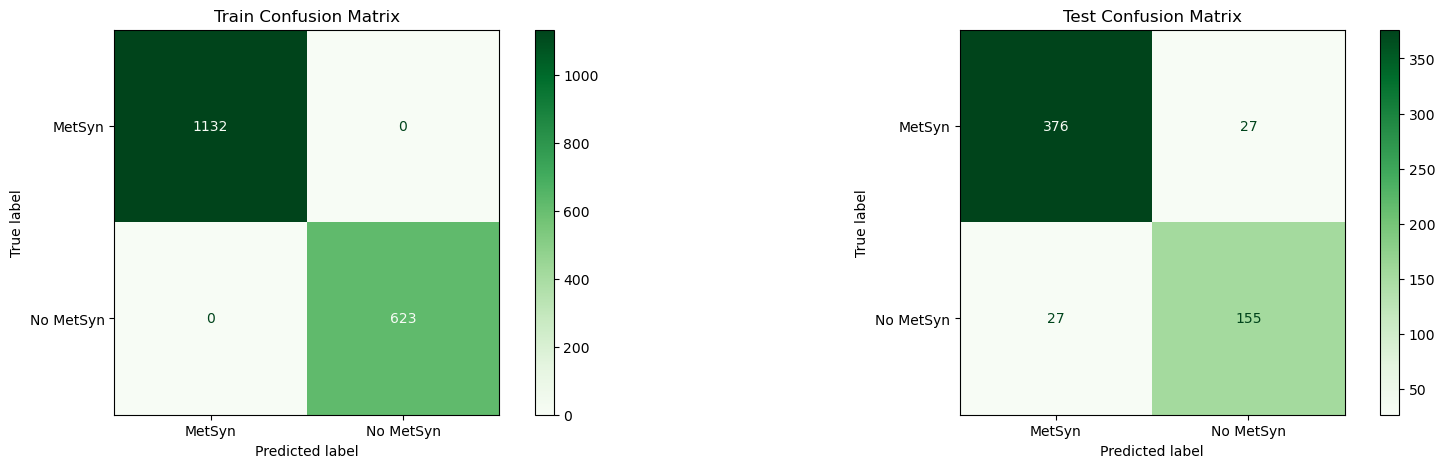

Train Accuracy  Train Recall  Train Precision  \
KNN Classifier             0.865527      0.840546         0.861311   
KNN Best Model             0.853561      0.818279         0.856852   
LightGBM Classifier        1.000000      1.000000         1.000000   
LightGBM best model        1.000000      1.000000         1.000000   

                     Train F1-Score  Test Accuracy  Test Recall  \
KNN Classifier             0.849103       0.820513     0.777827   
KNN Best Model             0.831899       0.817094     0.770826   
LightGBM Classifier        1.000000       0.904274     0.885324   
LightGBM best model        1.000000       0.907692     0.892325   

                     Test Precision  Test F1-Score  
KNN Classifier             0.794048       0.784912  
KNN Best Model             0.790988       0.779332  
LightGBM Classifier        0.890111       0.887654  
LightGBM best model        0.892325       0.892325

In [53]:
Grid_Search(lgbm_pipe,X_train, y_train, X_test, y_test, lgbm_params, lbl = 'LightGBM best model')

### Gradient

In [54]:
gbc = GradientBoostingClassifier()
gbc_pipe = make_pipeline(preprocessor, gbc)
gbc_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler()),
                                                                  ('simpleimputer',
                                                                   SimpleImputer())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001BE5B3AF220>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001BE5B366820>)])),
                ('gradientboostingclassifier', GradientBoostingClassifier())])

======Train Set Metrics======
              precision    recall  f1-score   support

      MetSyn       0.96      0.97      0.96      1132
   No MetSyn       0.95      0.92      0.93       623

    accuracy                           0.95      1755
   macro avg       0.95      0.95      0.95      1755
weighted avg       0.95      0.95      0.95      1755

======Test Set Metrics======
              precision    recall  f1-score   support

      MetSyn       0.92      0.95      0.93       403
   No MetSyn       0.88      0.81      0.84       182

    accuracy                           0.91       585
   macro avg       0.90      0.88      0.89       585
weighted avg       0.91      0.91      0.90       585



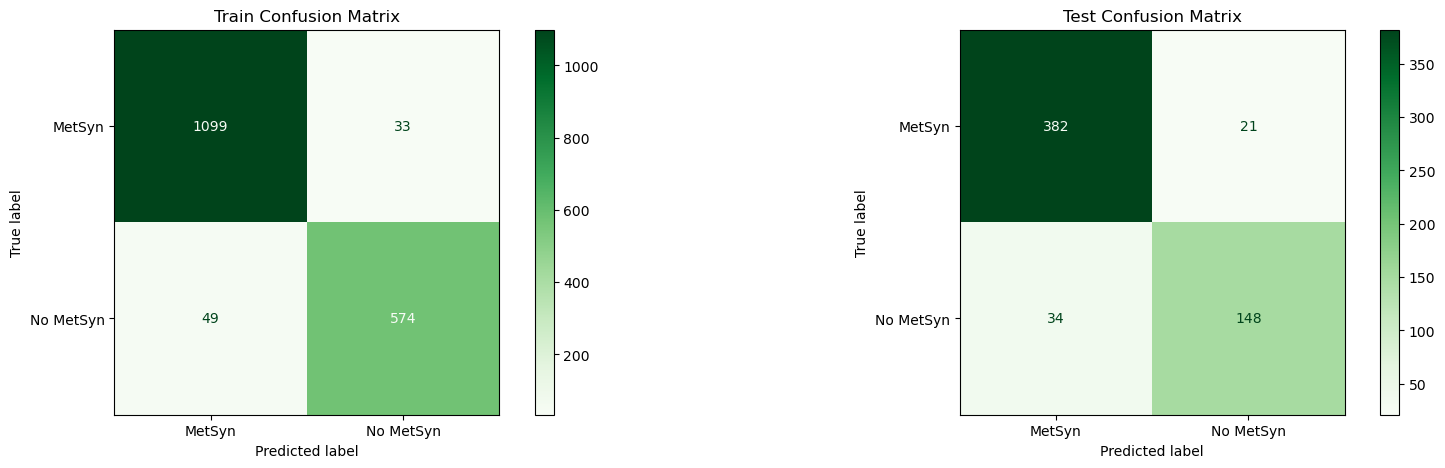

Train Accuracy  Train Recall  Train Precision  \
KNN Classifier                      0.865527      0.840546         0.861311   
KNN Best Model                      0.853561      0.818279         0.856852   
LightGBM Classifier                 1.000000      1.000000         1.000000   
LightGBM best model                 1.000000      1.000000         1.000000   
Gradient Boosting Classifier        0.953276      0.946098         0.951476   

                              Train F1-Score  Test Accuracy  Test Recall  \
KNN Classifier                      0.849103       0.820513     0.777827   
KNN Best Model                      0.831899       0.817094     0.770826   
LightGBM Classifier                 1.000000       0.904274     0.885324   
LightGBM best model                 1.000000       0.907692     0.892325   
Gradient Boosting Classifier        0.948684       0.905983     0.880539   

                              Test Precision  Test F1-Score  
KNN Classifier                      0.794048       0.784912  
KNN Best Model                      0.790988       0.779332  
LightGBM Classifier                 0.890111       0.887654  
LightGBM best model                 0.892325       0.892325  
Gradient Boosting Classifier        0.897004       0.888075

In [55]:
evaluate_classification(gbc_pipe, X_train, y_train, X_test, y_test,
                            cmap='Greens', normalize=None, 
                            figsize=(20,5), name='Gradient Boosting Classifier', 
                            average='macro', zero_division=0)

In [56]:
gbc_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('pipeline-1',
                                    Pipeline(steps=[('standardscaler',
                                                     StandardScaler()),
                                                    ('simpleimputer',
                                                     SimpleImputer())]),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x000001BE5B3AF220>),
                                   ('pipeline-2',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(strategy='most_frequent')),
                                                    ('onehotencoder',
                                                     OneHotEncoder(handle_unknown='ignore',
                                                                   sparse=False))]),
                          

In [57]:
gbc_params = {'gradientboostingclassifier__max_depth': [5, 10, 20],
          'gradientboostingclassifier__learning_rate': [0.1, 0.01]}

Best parameters of the model {'gradientboostingclassifier__learning_rate': 0.1, 'gradientboostingclassifier__max_depth': 5}
Best F1-score of the model 0.8735042735042736
======Train Set Metrics======
              precision    recall  f1-score   support

      MetSyn       1.00      1.00      1.00      1132
   No MetSyn       1.00      1.00      1.00       623

    accuracy                           1.00      1755
   macro avg       1.00      1.00      1.00      1755
weighted avg       1.00      1.00      1.00      1755

======Test Set Metrics======
              precision    recall  f1-score   support

      MetSyn       0.93      0.93      0.93       403
   No MetSyn       0.84      0.84      0.84       182

    accuracy                           0.90       585
   macro avg       0.88      0.88      0.88       585
weighted avg       0.90      0.90      0.90       585



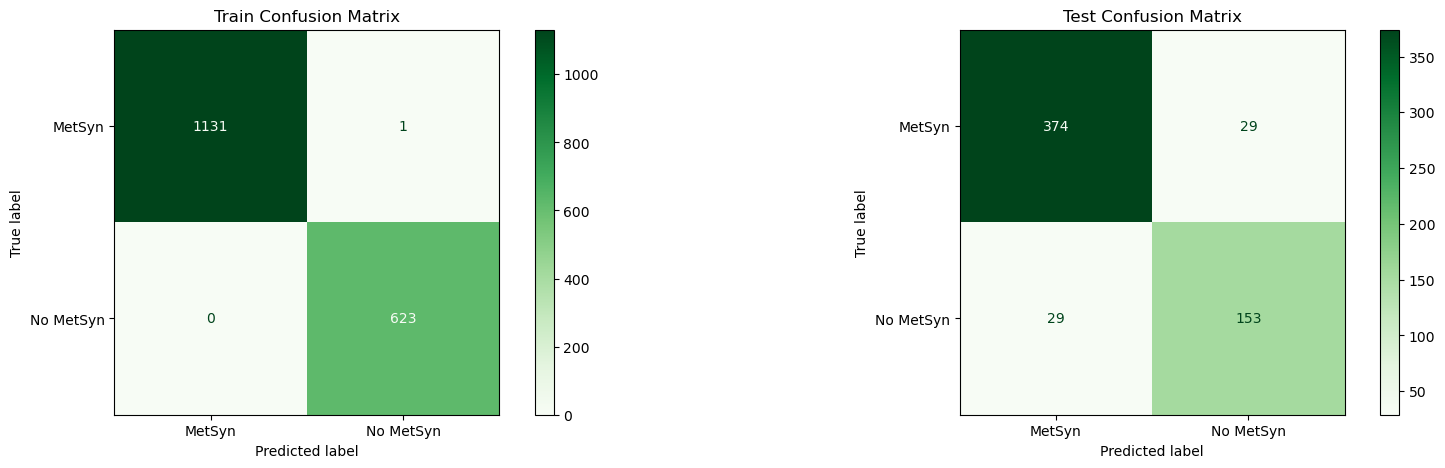

Train Accuracy  Train Recall  Train Precision  \
KNN Classifier                      0.865527      0.840546         0.861311   
KNN Best Model                      0.853561      0.818279         0.856852   
LightGBM Classifier                 1.000000      1.000000         1.000000   
LightGBM best model                 1.000000      1.000000         1.000000   
Gradient Boosting Classifier        0.953276      0.946098         0.951476   
GBC best model                      0.999430      0.999558         0.999199   

                              Train F1-Score  Test Accuracy  Test Recall  \
KNN Classifier                      0.849103       0.820513     0.777827   
KNN Best Model                      0.831899       0.817094     0.770826   
LightGBM Classifier                 1.000000       0.904274     0.885324   
LightGBM best model                 1.000000       0.907692     0.892325   
Gradient Boosting Classifier        0.948684       0.905983     0.880539   
GBC best model                      0.999378       0.900855     0.884350   

                              Test Precision  Test F1-Score  
KNN Classifier                      0.794048       0.784912  
KNN Best Model                      0.790988       0.779332  
LightGBM Classifier                 0.890111       0.887654  
LightGBM best model                 0.892325       0.892325  
Gradient Boosting Classifier        0.897004       0.888075  
GBC best model                      0.884350       0.884350

In [58]:
Grid_Search(gbc_pipe,X_train, y_train, X_test, y_test, gbc_params, lbl = 'GBC best model')

### XGBoost

In [59]:
xgb = XGBClassifier()
xgb_pipe = make_pipeline(preprocessor, xgb)
xgb_pipe.fit(X_train,y_train)

[17:36:28] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler()),
                                                                  ('simpleimputer',
                                                                   SimpleImputer())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001BE5B3AF220>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('one...
                               gamma=0, gpu_id=-1, importance_type=None,
                               interaction_constraints='',
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=6, min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=6, num_parallel_tree=1, predictor='auto',
                               random_state=0, reg_alpha=0, reg_lambda=1,
                               scale_pos_weight=1, subsample=1,
                               tree_method='exact', validate_parameters=1,
                               verbosity=None))])

======Train Set Metrics======
              precision    recall  f1-score   support

      MetSyn       1.00      1.00      1.00      1132
   No MetSyn       1.00      1.00      1.00       623

    accuracy                           1.00      1755
   macro avg       1.00      1.00      1.00      1755
weighted avg       1.00      1.00      1.00      1755

======Test Set Metrics======
              precision    recall  f1-score   support

      MetSyn       0.92      0.93      0.92       403
   No MetSyn       0.84      0.82      0.83       182

    accuracy                           0.90       585
   macro avg       0.88      0.87      0.88       585
weighted avg       0.90      0.90      0.90       585



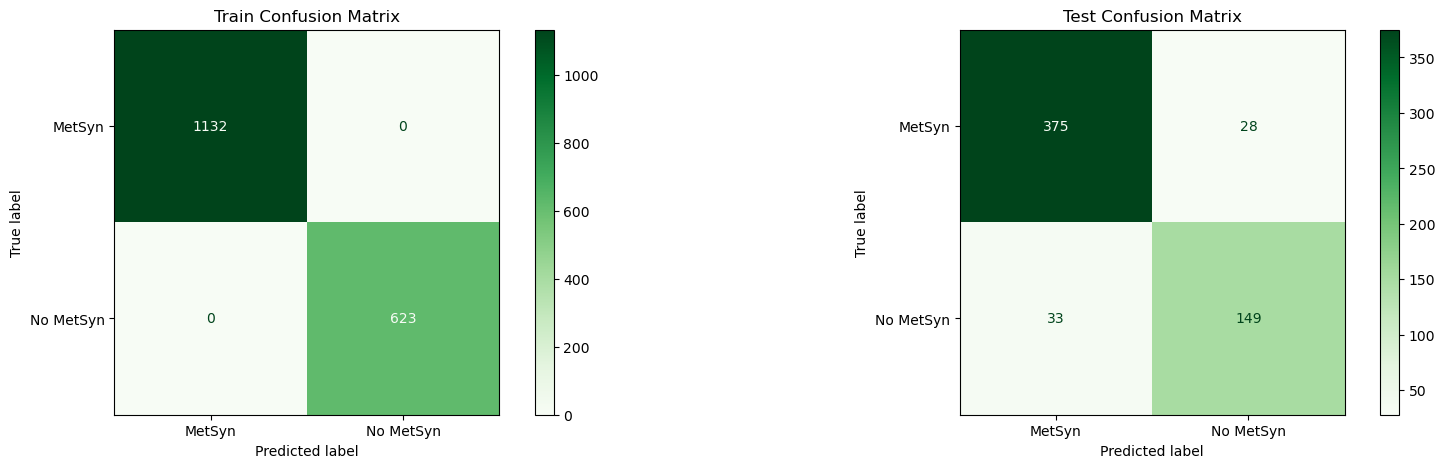

Train Accuracy  Train Recall  Train Precision  \
KNN Classifier                      0.865527      0.840546         0.861311   
KNN Best Model                      0.853561      0.818279         0.856852   
LightGBM Classifier                 1.000000      1.000000         1.000000   
LightGBM best model                 1.000000      1.000000         1.000000   
Gradient Boosting Classifier        0.953276      0.946098         0.951476   
GBC best model                      0.999430      0.999558         0.999199   
XGB Classifier                      1.000000      1.000000         1.000000   

                              Train F1-Score  Test Accuracy  Test Recall  \
KNN Classifier                      0.849103       0.820513     0.777827   
KNN Best Model                      0.831899       0.817094     0.770826   
LightGBM Classifier                 1.000000       0.904274     0.885324   
LightGBM best model                 1.000000       0.907692     0.892325   
Gradient Boosting Classifier        0.948684       0.905983     0.880539   
GBC best model                      0.999378       0.900855     0.884350   
XGB Classifier                      1.000000       0.895726     0.874601   

                              Test Precision  Test F1-Score  
KNN Classifier                      0.794048       0.784912  
KNN Best Model                      0.790988       0.779332  
LightGBM Classifier                 0.890111       0.887654  
LightGBM best model                 0.892325       0.892325  
Gradient Boosting Classifier        0.897004       0.888075  
GBC best model                      0.884350       0.884350  
XGB Classifier                      0.880463       0.877434

In [60]:
evaluate_classification(xgb_pipe, X_train, y_train, X_test, y_test,
                            cmap='Greens', normalize=None, 
                            figsize=(20,5), name='XGB Classifier', 
                            average='macro', zero_division=0)

In [61]:
xgb_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('pipeline-1',
                                    Pipeline(steps=[('standardscaler',
                                                     StandardScaler()),
                                                    ('simpleimputer',
                                                     SimpleImputer())]),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x000001BE5B3AF220>),
                                   ('pipeline-2',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(strategy='most_frequent')),
                                                    ('onehotencoder',
                                                     OneHotEncoder(handle_unknown='ignore',
                                                                   sparse=False))]),
                          

In [62]:
xgb_params = {'xgbclassifier__max_depth': [3, 5, 7],
              'xgbclassifier__n_estimators':[100, 200, 300]}

[17:36:29] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:36:29] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:36:29] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:36:29] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation me

[17:36:32] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:36:32] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:36:32] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:36:33] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation me

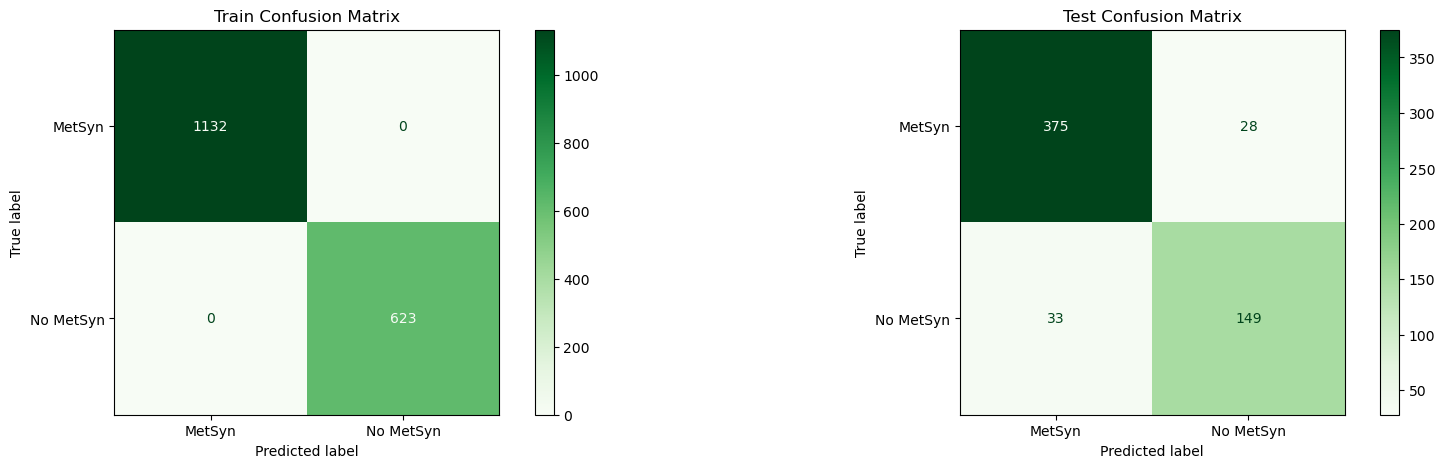

Train Accuracy  Train Recall  Train Precision  \
KNN Classifier                      0.865527      0.840546         0.861311   
KNN Best Model                      0.853561      0.818279         0.856852   
LightGBM Classifier                 1.000000      1.000000         1.000000   
LightGBM best model                 1.000000      1.000000         1.000000   
Gradient Boosting Classifier        0.953276      0.946098         0.951476   
GBC best model                      0.999430      0.999558         0.999199   
XGB Classifier                      1.000000      1.000000         1.000000   
XGB best model                      1.000000      1.000000         1.000000   

                              Train F1-Score  Test Accuracy  Test Recall  \
KNN Classifier                      0.849103       0.820513     0.777827   
KNN Best Model                      0.831899       0.817094     0.770826   
LightGBM Classifier                 1.000000       0.904274     0.885324   
LightGBM best model                 1.000000       0.907692     0.892325   
Gradient Boosting Classifier        0.948684       0.905983     0.880539   
GBC best model                      0.999378       0.900855     0.884350   
XGB Classifier                      1.000000       0.895726     0.874601   
XGB best model                      1.000000       0.895726     0.874601   

                              Test Precision  Test F1-Score  
KNN Classifier                      0.794048       0.784912  
KNN Best Model                      0.790988       0.779332  
LightGBM Classifier                 0.890111       0.887654  
LightGBM best model                 0.892325       0.892325  
Gradient Boosting Classifier        0.897004       0.888075  
GBC best model                      0.884350       0.884350  
XGB Classifier                      0.880463       0.877434  
XGB best model                      0.880463       0.877434

In [63]:
Grid_Search(xgb_pipe,X_train, y_train, X_test, y_test, xgb_params, lbl = 'XGB best model')

### Logistic Regression Balance

In [64]:
log_reg_bal = LogisticRegression(max_iter=1000, class_weight='balanced')
## Create a model pipeline
log_reg_bal_pipe = make_pipeline(preprocessor, log_reg_bal)
## Fit the model
log_reg_bal_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler()),
                                                                  ('simpleimputer',
                                                                   SimpleImputer())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001BE5B3AF220>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001BE5B366820>)])),
                ('logisticregression',
                 LogisticRegression(class_weight='balanced', max_iter=1000))])

======Train Set Metrics======
              precision    recall  f1-score   support

      MetSyn       0.90      0.82      0.86      1132
   No MetSyn       0.72      0.83      0.77       623

    accuracy                           0.83      1755
   macro avg       0.81      0.83      0.81      1755
weighted avg       0.83      0.83      0.83      1755

======Test Set Metrics======
              precision    recall  f1-score   support

      MetSyn       0.91      0.82      0.87       403
   No MetSyn       0.68      0.83      0.75       182

    accuracy                           0.83       585
   macro avg       0.80      0.83      0.81       585
weighted avg       0.84      0.83      0.83       585



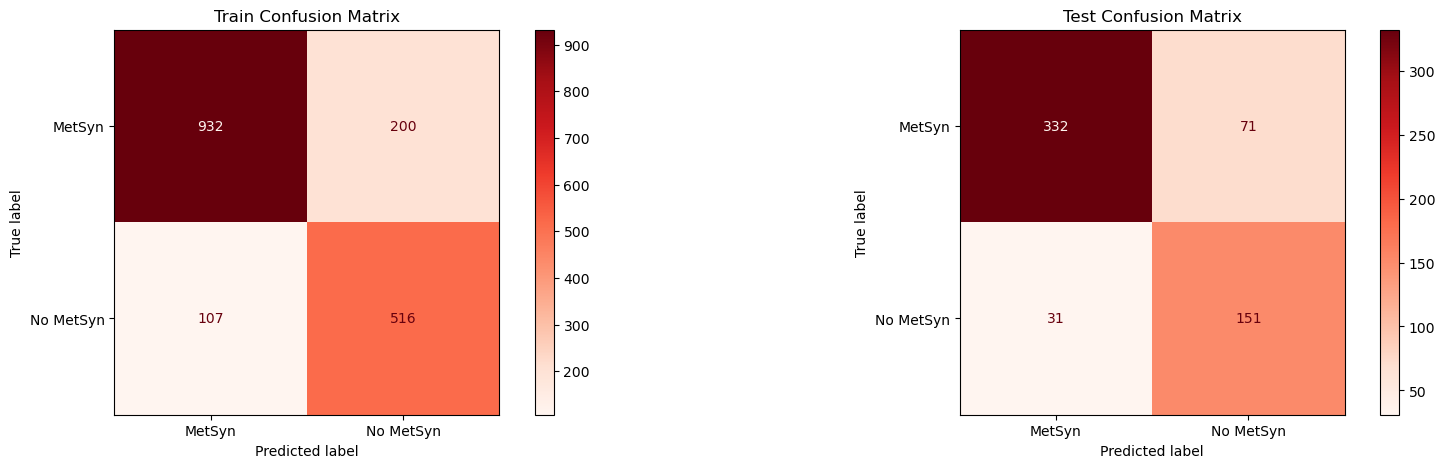

Train Accuracy  Train Recall  Train Precision  \
KNN Classifier                      0.865527      0.840546         0.861311   
KNN Best Model                      0.853561      0.818279         0.856852   
LightGBM Classifier                 1.000000      1.000000         1.000000   
LightGBM best model                 1.000000      1.000000         1.000000   
Gradient Boosting Classifier        0.953276      0.946098         0.951476   
GBC best model                      0.999430      0.999558         0.999199   
XGB Classifier                      1.000000      1.000000         1.000000   
XGB best model                      1.000000      1.000000         1.000000   
Logistic Regression Balanced        0.825071      0.825786         0.808843   

                              Train F1-Score  Test Accuracy  Test Recall  \
KNN Classifier                      0.849103       0.820513     0.777827   
KNN Best Model                      0.831899       0.817094     0.770826   
LightGBM Classifier                 1.000000       0.904274     0.885324   
LightGBM best model                 1.000000       0.907692     0.892325   
Gradient Boosting Classifier        0.948684       0.905983     0.880539   
GBC best model                      0.999378       0.900855     0.884350   
XGB Classifier                      1.000000       0.895726     0.874601   
XGB best model                      1.000000       0.895726     0.874601   
Logistic Regression Balanced        0.814657       0.825641     0.826746   

                              Test Precision  Test F1-Score  
KNN Classifier                      0.794048       0.784912  
KNN Best Model                      0.790988       0.779332  
LightGBM Classifier                 0.890111       0.887654  
LightGBM best model                 0.892325       0.892325  
Gradient Boosting Classifier        0.897004       0.888075  
GBC best model                      0.884350       0.884350  
XGB Classifier                      0.880463       0.877434  
XGB best model                      0.880463       0.877434  
Logistic Regression Balanced        0.797390       0.807183

In [65]:
evaluate_classification(log_reg_bal_pipe, X_train, y_train, X_test, y_test,
                            cmap='Reds', normalize=None, 
                            figsize=(20,5), name='Logistic Regression Balanced', 
                            average='macro', zero_division=0)

### Under Sampling

In [66]:
## Create the under sampling object
under_sampler = RandomUnderSampler()

In [67]:
## Display the value counts for y_train
print('y_train imbalance')
display(y_train.value_counts())
## undersample the y_train
X_train_under, y_train_under = under_sampler.fit_resample(X_train, y_train)
## Display the value counts for y_train_undersampled
print('\ny_train_under balance')
y_train_under.value_counts()

y_train imbalance


0    1132
1     623
Name: metabolicsyndrome, dtype: int64


y_train_under balance


0    623
1    623
Name: metabolicsyndrome, dtype: int64

In [68]:
log_reg_under = LogisticRegression(max_iter=1000)
log_reg_under_pipe = imblearn_pipe(preprocessor, under_sampler, log_reg_under)
log_reg_under_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler()),
                                                                  ('simpleimputer',
                                                                   SimpleImputer())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001BE5B3AF220>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001BE5B366820>)])),
                ('randomundersampler', RandomUnderSampler()),
                ('logisticregression', LogisticRegression(max_iter=1000))])

======Train Set Metrics======
              precision    recall  f1-score   support

      MetSyn       0.90      0.83      0.86      1132
   No MetSyn       0.73      0.83      0.78       623

    accuracy                           0.83      1755
   macro avg       0.81      0.83      0.82      1755
weighted avg       0.84      0.83      0.83      1755

======Test Set Metrics======
              precision    recall  f1-score   support

      MetSyn       0.91      0.83      0.86       403
   No MetSyn       0.68      0.81      0.74       182

    accuracy                           0.82       585
   macro avg       0.79      0.82      0.80       585
weighted avg       0.84      0.82      0.83       585



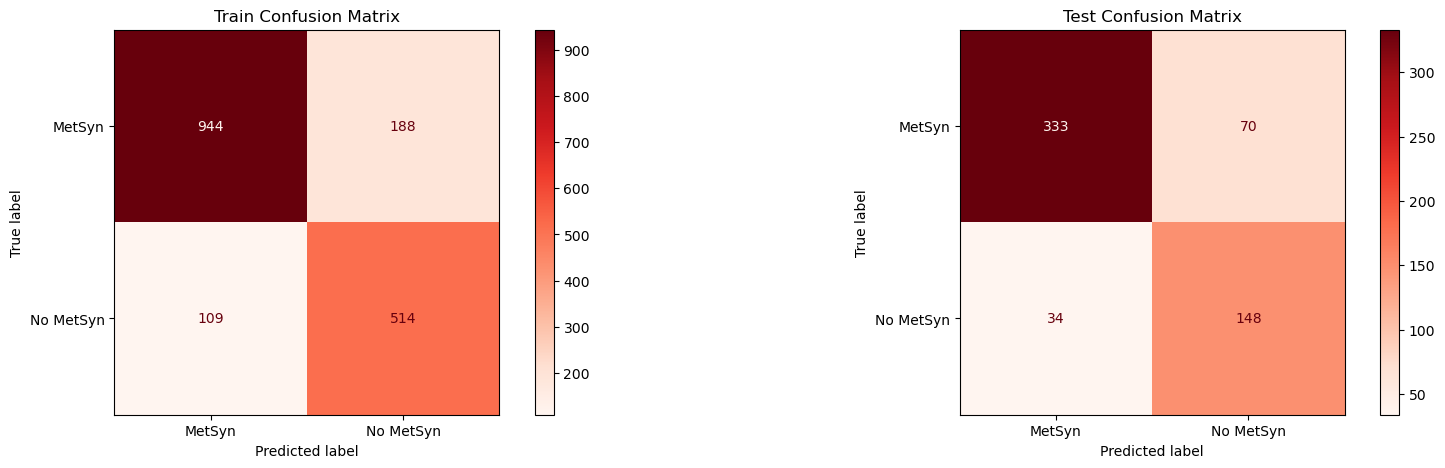

Train Accuracy  Train Recall  \
KNN Classifier                           0.865527      0.840546   
KNN Best Model                           0.853561      0.818279   
LightGBM Classifier                      1.000000      1.000000   
LightGBM best model                      1.000000      1.000000   
Gradient Boosting Classifier             0.953276      0.946098   
GBC best model                           0.999430      0.999558   
XGB Classifier                           1.000000      1.000000   
XGB best model                           1.000000      1.000000   
Logistic Regression Balanced             0.825071      0.825786   
Logistic Regression UnderSampling        0.830769      0.829481   

                                   Train Precision  Train F1-Score  \
KNN Classifier                            0.861311        0.849103   
KNN Best Model                            0.856852        0.831899   
LightGBM Classifier                       1.000000        1.000000   
LightGBM best model                       1.000000        1.000000   
Gradient Boosting Classifier              0.951476        0.948684   
GBC best model                            0.999199        0.999378   
XGB Classifier                            1.000000        1.000000   
XGB best model                            1.000000        1.000000   
Logistic Regression Balanced              0.808843        0.814657   
Logistic Regression UnderSampling         0.814340        0.819961   

                                   Test Accuracy  Test Recall  Test Precision  \
KNN Classifier                          0.820513     0.777827        0.794048   
KNN Best Model                          0.817094     0.770826        0.790988   
LightGBM Classifier                     0.904274     0.885324        0.890111   
LightGBM best model                     0.907692     0.892325        0.892325   
Gradient Boosting Classifier            0.905983     0.880539        0.897004   
GBC best model                          0.900855     0.884350        0.884350   
XGB Classifier                          0.895726     0.874601        0.880463   
XGB best model                          0.895726     0.874601        0.880463   
Logistic Regression Balanced            0.825641     0.826746        0.797390   
Logistic Regression UnderSampling       0.822222     0.819745        0.793128   

                                   Test F1-Score  
KNN Classifier                          0.784912  
KNN Best Model                          0.779332  
LightGBM Classifier                     0.887654  
LightGBM best model                     0.892325  
Gradient Boosting Classifier            0.888075  
GBC best model                          0.884350  
XGB Classifier                          0.877434  
XGB best model                          0.877434  
Logistic Regression Balanced            0.807183  
Logistic Regression UnderSampling       0.802468

In [69]:
evaluate_classification(log_reg_under_pipe, X_train, y_train, X_test, y_test,
                            cmap='Reds', normalize=None, 
                            figsize=(20,5), name='Logistic Regression UnderSampling', 
                            average='macro', zero_division=0)

### Over Sampling

In [70]:
## Create the under sampling object
over_sampler = RandomOverSampler()

In [71]:
## Display the value counts for y_train
print('y_train balance')
display(y_train.value_counts())

## undersample the y_train
X_train_over, y_train_over = over_sampler.fit_resample(X_train, y_train)
## Display the value counts for y_train_undersampled
print('\ny_train_under balance')
y_train_over.value_counts()

y_train balance


0    1132
1     623
Name: metabolicsyndrome, dtype: int64


y_train_under balance


0    1132
1    1132
Name: metabolicsyndrome, dtype: int64

In [72]:
log_reg_over = LogisticRegression(max_iter=1000)
log_reg_over_pipe = imblearn_pipe(preprocessor, over_sampler, log_reg_over)
log_reg_over_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler()),
                                                                  ('simpleimputer',
                                                                   SimpleImputer())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001BE5B3AF220>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001BE5B366820>)])),
                ('randomoversampler', RandomOverSampler()),
                ('logisticregression', LogisticRegression(max_iter=1000))])

======Train Set Metrics======
              precision    recall  f1-score   support

      MetSyn       0.90      0.83      0.86      1132
   No MetSyn       0.72      0.83      0.77       623

    accuracy                           0.83      1755
   macro avg       0.81      0.83      0.82      1755
weighted avg       0.84      0.83      0.83      1755

======Test Set Metrics======
              precision    recall  f1-score   support

      MetSyn       0.92      0.83      0.87       403
   No MetSyn       0.68      0.84      0.75       182

    accuracy                           0.83       585
   macro avg       0.80      0.83      0.81       585
weighted avg       0.84      0.83      0.83       585



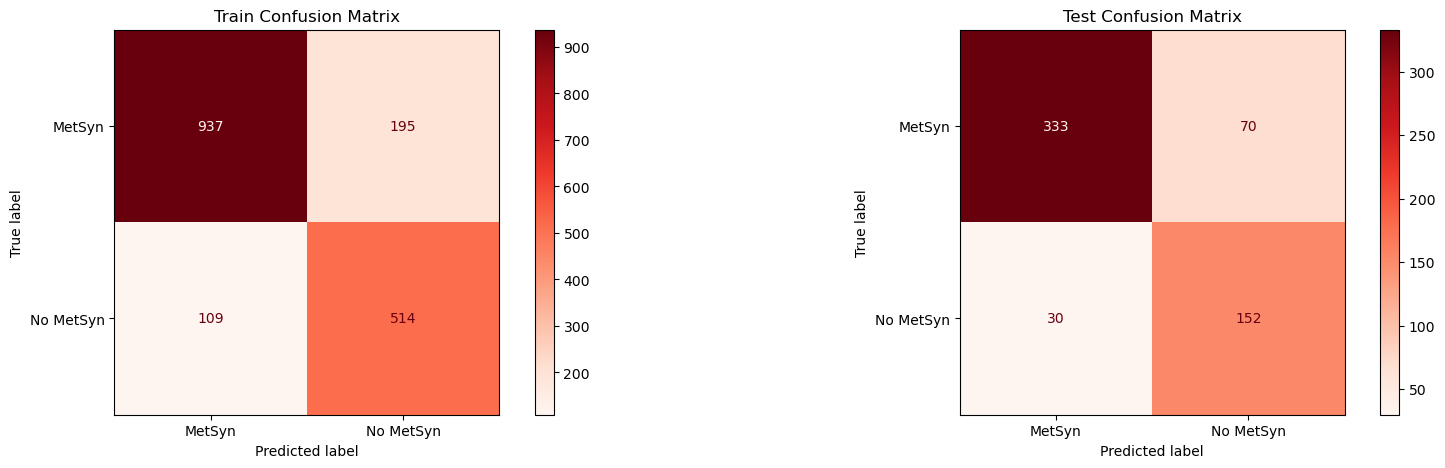

Train Accuracy  Train Recall  \
KNN Classifier                           0.865527      0.840546   
KNN Best Model                           0.853561      0.818279   
LightGBM Classifier                      1.000000      1.000000   
LightGBM best model                      1.000000      1.000000   
Gradient Boosting Classifier             0.953276      0.946098   
GBC best model                           0.999430      0.999558   
XGB Classifier                           1.000000      1.000000   
XGB best model                           1.000000      1.000000   
Logistic Regression Balanced             0.825071      0.825786   
Logistic Regression UnderSampling        0.830769      0.829481   
Logistic Regression OverSampling         0.826781      0.826389   

                                   Train Precision  Train F1-Score  \
KNN Classifier                            0.861311        0.849103   
KNN Best Model                            0.856852        0.831899   
LightGBM Classifier                       1.000000        1.000000   
LightGBM best model                       1.000000        1.000000   
Gradient Boosting Classifier              0.951476        0.948684   
GBC best model                            0.999199        0.999378   
XGB Classifier                            1.000000        1.000000   
XGB best model                            1.000000        1.000000   
Logistic Regression Balanced              0.808843        0.814657   
Logistic Regression UnderSampling         0.814340        0.819961   
Logistic Regression OverSampling          0.810379        0.816097   

                                   Test Accuracy  Test Recall  Test Precision  \
KNN Classifier                          0.820513     0.777827        0.794048   
KNN Best Model                          0.817094     0.770826        0.790988   
LightGBM Classifier                     0.904274     0.885324        0.890111   
LightGBM best model                     0.907692     0.892325        0.892325   
Gradient Boosting Classifier            0.905983     0.880539        0.897004   
GBC best model                          0.900855     0.884350        0.884350   
XGB Classifier                          0.895726     0.874601        0.880463   
XGB best model                          0.895726     0.874601        0.880463   
Logistic Regression Balanced            0.825641     0.826746        0.797390   
Logistic Regression UnderSampling       0.822222     0.819745        0.793128   
Logistic Regression OverSampling        0.829060     0.830734        0.801020   

                                   Test F1-Score  
KNN Classifier                          0.784912  
KNN Best Model                          0.779332  
LightGBM Classifier                     0.887654  
LightGBM best model                     0.892325  
Gradient Boosting Classifier            0.888075  
GBC best model                          0.884350  
XGB Classifier                          0.877434  
XGB best model                          0.877434  
Logistic Regression Balanced            0.807183  
Logistic Regression UnderSampling       0.802468  
Logistic Regression OverSampling        0.810963

In [73]:
evaluate_classification(log_reg_over_pipe, X_train, y_train, X_test, y_test,
                            cmap='Reds', normalize=None, 
                            figsize=(20,5), name='Logistic Regression OverSampling', 
                            average='macro', zero_division=0)

## Clustering

### Reload data & loading new libraries

In [74]:
#import new libraries for clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [75]:
ms2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2340 entries, 0 to 2400
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                2340 non-null   int64  
 1   sex                2340 non-null   object 
 2   marital            2138 non-null   object 
 3   income             2226 non-null   float64
 4   race               2340 non-null   object 
 5   waistcirc          2257 non-null   float64
 6   bmi                2314 non-null   float64
 7   albuminuria        2340 non-null   object 
 8   uralbcr            2340 non-null   float64
 9   uricacid           2340 non-null   float64
 10  bloodglucose       2340 non-null   int64  
 11  hdl                2340 non-null   int64  
 12  triglycerides      2340 non-null   int64  
 13  metabolicsyndrome  2340 non-null   object 
dtypes: float64(5), int64(4), object(5)
memory usage: 274.2+ KB


**Planning the exploration**

-  Use Kmeans to establish a good number of cluster by age, bmi , bloodglucose columns.  
- Explore each group for better understandings
- Combine all features

### Handling missing values

In [76]:
#We need to handle missing values in the our data
#by using simpleimputer with mean most frequent strategy
ms2[cat_cols] = freq_imputer.fit_transform(ms2[cat_cols])
ms2[num_selector] = mean_imputer.fit_transform(ms2[num_selector])

In [77]:
ms2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2340 entries, 0 to 2400
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                2340 non-null   float64
 1   sex                2340 non-null   object 
 2   marital            2340 non-null   object 
 3   income             2340 non-null   float64
 4   race               2340 non-null   object 
 5   waistcirc          2340 non-null   float64
 6   bmi                2340 non-null   float64
 7   albuminuria        2340 non-null   object 
 8   uralbcr            2340 non-null   float64
 9   uricacid           2340 non-null   float64
 10  bloodglucose       2340 non-null   float64
 11  hdl                2340 non-null   float64
 12  triglycerides      2340 non-null   float64
 13  metabolicsyndrome  2340 non-null   object 
dtypes: float64(9), object(5)
memory usage: 274.2+ KB


There is no more missing values in our data

### Mapping values for categorical Columns

In [78]:
#Mapping only the metabolicsyndrome column
#So we will not losing metabolicsyndrome columns when we conduct mean of all features
ms2['metabolicsyndrome'] = ms2['metabolicsyndrome'].map(target_map)

In [79]:
cf = ms2[['age', 'bmi', 'bloodglucose']]

In [80]:
cf.head()

age   bmi  bloodglucose
0  22.0  23.3          92.0
1  44.0  23.2          82.0
2  21.0  20.1         107.0
3  43.0  33.3         104.0
4  51.0  20.1          95.0

In [81]:
#scale data
scaled_cf = scaler.fit_transform(cf)

### Finding the best number of clusters

**Inertia**

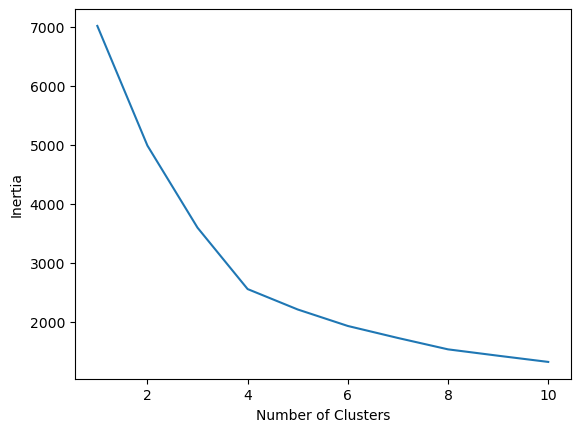

In [82]:
ks = range(1, 11)
inertias = []

# for each value for k
for k in ks:
  
  # fit and run the model,
  km = KMeans(n_clusters=k)
  km.fit(scaled_cf)
  inertias.append(km.inertia_)

# and plot the results
plt.plot(ks, inertias)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show() ;

- According to the elbow method we could see that 4 is the good tradeoff for the number of clusters.

**Silhouette Score**

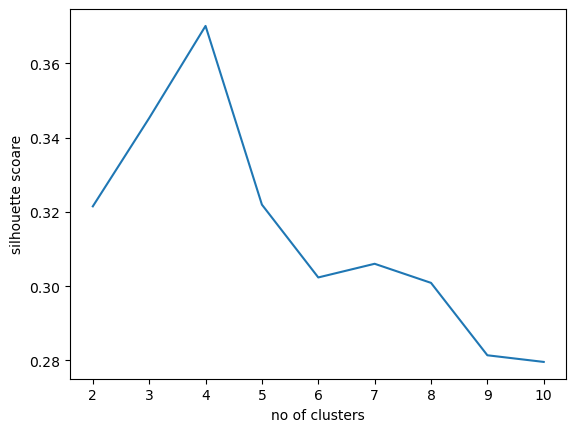

In [83]:
# define a range of values of k to evaluate for silhouette score and empty list
ks = range(2, 11)
sils = []

# for each value for k
for k in ks:

    # fit and run the model
    km = KMeans(n_clusters=k)
    km.fit(scaled_cf)
    sils.append(silhouette_score(scaled_cf, km.labels_))

# and plot the results
plt.plot(ks, sils)
plt.xlabel('no of clusters')
plt.ylabel('silhouette scoare')
plt.show() 

- the silhouette score also implies that 4 is the best number of cluster. Therefore, we will choose 4 clusters for this dataset.

### Final model and Clustering the dataset

In [84]:
km = KMeans(n_clusters=4, random_state=4)
km.fit(scaled_cf)

KMeans(n_clusters=4, random_state=4)

In [85]:
#create a columns cluster to the dataframe
ms2['cluster'] = km.labels_

In [86]:
ms2.head()

age     sex  marital       income   race  waistcirc   bmi albuminuria  \
0  22.0    Male   Single  8200.000000  White       81.0  23.3           0   
1  44.0  Female  Married  4500.000000  White       80.1  23.2           0   
2  21.0    Male   Single   800.000000  Asian       69.6  20.1           0   
3  43.0  Female   Single  2000.000000  Black      120.4  33.3           0   
4  51.0    Male  Married  4020.709793  Asian       81.1  20.1           0   

   uralbcr  uricacid  bloodglucose   hdl  triglycerides  metabolicsyndrome  \
0     3.88       4.9          92.0  41.0           84.0                  0   
1     8.55       4.5          82.0  28.0           56.0                  0   
2     5.07       5.4         107.0  43.0           78.0                  0   
3     5.22       5.0         104.0  73.0          141.0                  0   
4     8.13       5.0          95.0  43.0          126.0                  0   

   cluster  
0        1  
1        1  
2        1  
3        0  
4        1

### Investigate each of the clusters

We will not investigate other categorical columns except the metabolic syndrome to reduce confusion for stakeholders, because we have to encoded all these columns if we want to cluster these features.

In [87]:
clusters = ms2.groupby('cluster', as_index=False)

In [88]:
clusters_mean = clusters.mean()
clusters_mean

cluster        age       income   waistcirc        bmi     uralbcr  \
0        0  47.449883  3612.981882  118.496714  38.490676   60.959814   
1        1  33.426178  4280.968422   89.343155  25.563873   14.194890   
2        2  57.241758  3444.866365  108.346904  32.309980  142.364835   
3        3  65.621965  3996.166482   97.239710  26.949141   58.658809   

   uricacid  bloodglucose        hdl  triglycerides  metabolicsyndrome  
0  5.973660    109.305361  48.386946     141.515152           0.608392  
1  5.176335     94.710995  53.918325     116.062827           0.141361  
2  5.336264    250.571429  42.615385     218.615385           0.758242  
3  5.623699    107.483237  56.339884     126.374566           0.393064

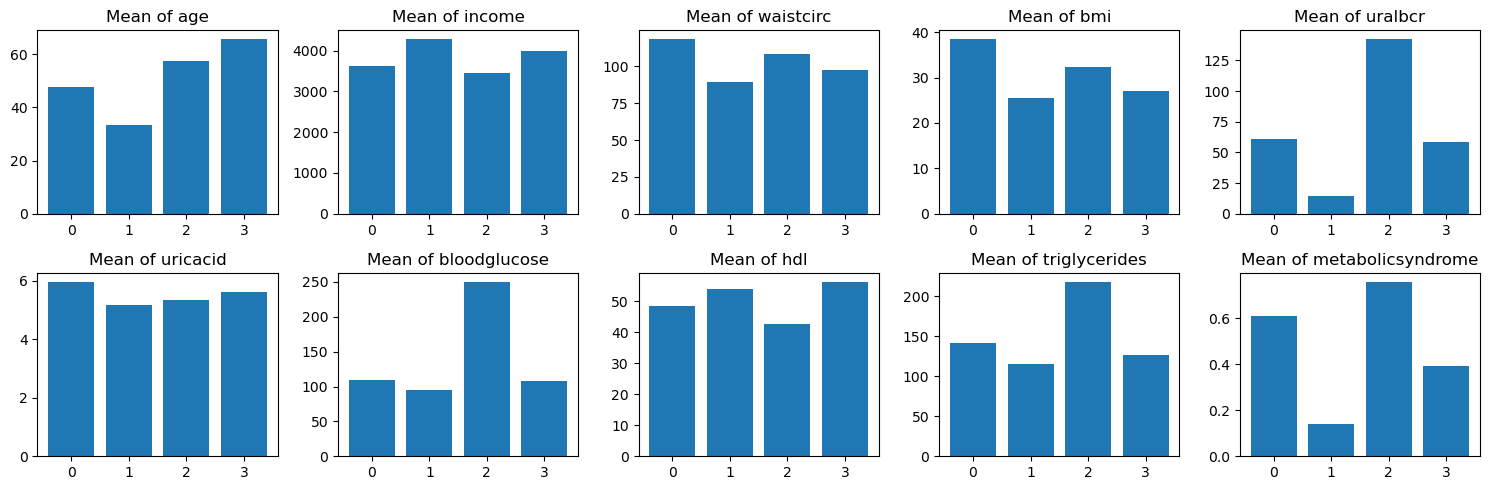

In [89]:
fig, axes = plt.subplots(2,5,figsize=(15,5))
axes = axes.ravel()
for i, col in enumerate(clusters_mean.columns[1:]):
    axes[i].bar(clusters_mean['cluster'], clusters_mean[col])
    axes[i].set_title(f'Mean of {col}')
plt.tight_layout();

- Cluster 0: They are patients in middle 40s, they have average income, highest waist circumference and bmi, their blood measurements are in average to high level of risks of health diseases that can be detected by blood measurements of this dataset, they are highly detected to metabolic syndrome.

- Cluster 1: They are young people, highest income among others, lowest bmi and waist circumference, their blood measurements are the best among other clusters. They have the lowest rate to get detected with metabolic syndrome.  

- Cluster 2: They are the group of people of middle age to old, they have lowest mean of income among other clusters. They have average bmi and waist circumference. Their blood measurement is relatively in highest risks, they also have highest chance of getting metabolic syndrome.

- Cluster 3: They are seniors, they have high income as they are maybe retired or having big savings after their careers. Surprisingly, their bmi and waist is lower than cluster 2 and 0 a lot. However, their blood measurements are the worst among other clusters, so their metabolic syndrome detection is high. 

### 3D plotting

In [90]:
import plotly.express as px
px.scatter_3d(ms2, x='bmi',
              y='bloodglucose',
              z='waistcirc',
              color='cluster')

> We can see the distribution of clusters by bmi, blood glucose, and waist circumference.

## PCA

In [91]:
#Create a default pca with 95% of variance
pca = PCA(n_components=0.95)
pca_pipe =make_pipeline(preprocessor, pca)

In [92]:
logreg = LogisticRegression()
logreg_pipe_pca = make_pipeline(pca_pipe, logreg)
logreg_pipe_pca.fit(X_train, y_train)

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('columntransformer',
                                  ColumnTransformer(transformers=[('pipeline-1',
                                                                   Pipeline(steps=[('standardscaler',
                                                                                    StandardScaler()),
                                                                                   ('simpleimputer',
                                                                                    SimpleImputer())]),
                                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x000001BE5B3AF220>),
                                                                  ('pipeline-2',
                                                                   Pipeline(steps=[('simpleimputer',
                                                                                    SimpleImputer(strategy='most_frequent')),
                                                                                   ('onehotencoder',
                                                                                    OneHotEncoder(handle_unknown='ignore',
                                                                                                  sparse=False))]),
                                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x000001BE5B366820>)])),
                                 ('pca', PCA(n_components=0.95))])),
                ('logisticregression', LogisticRegression())])

In [93]:
pred_train_pca = logreg_pipe_pca.predict(X_train)
pred_test_pca = logreg_pipe_pca.predict(X_test)


======Train Set Metrics======
              precision    recall  f1-score   support

      MetSyn       0.85      0.91      0.88      1132
   No MetSyn       0.81      0.72      0.76       623

    accuracy                           0.84      1755
   macro avg       0.83      0.81      0.82      1755
weighted avg       0.84      0.84      0.84      1755

======Test Set Metrics======
              precision    recall  f1-score   support

      MetSyn       0.88      0.89      0.88       403
   No MetSyn       0.74      0.73      0.73       182

    accuracy                           0.84       585
   macro avg       0.81      0.81      0.81       585
weighted avg       0.83      0.84      0.84       585



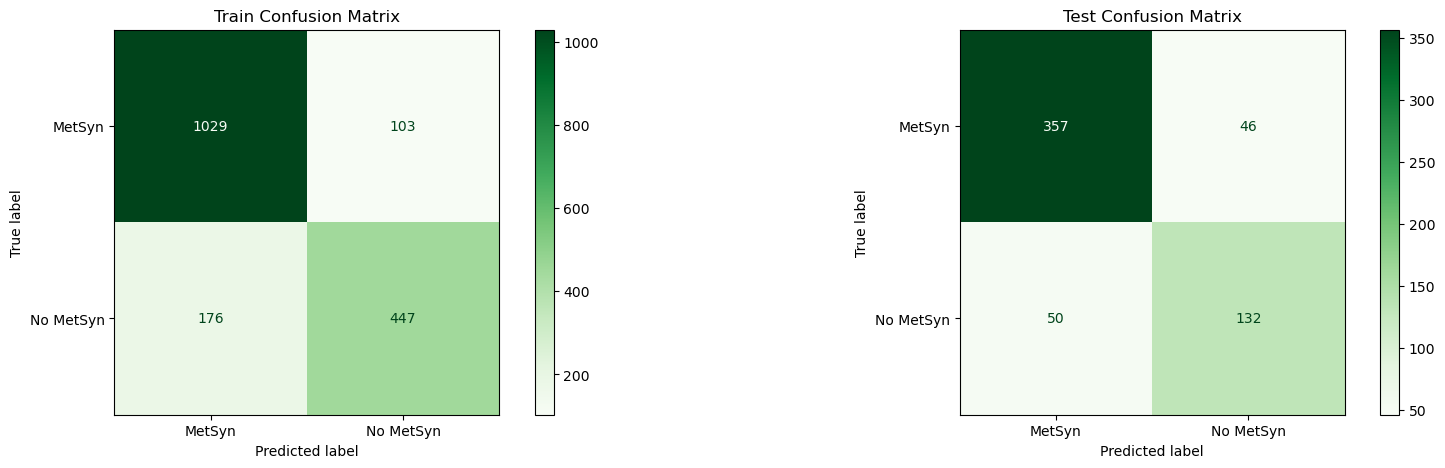

Train Accuracy  Train Recall  \
KNN Classifier                           0.865527      0.840546   
KNN Best Model                           0.853561      0.818279   
LightGBM Classifier                      1.000000      1.000000   
LightGBM best model                      1.000000      1.000000   
Gradient Boosting Classifier             0.953276      0.946098   
GBC best model                           0.999430      0.999558   
XGB Classifier                           1.000000      1.000000   
XGB best model                           1.000000      1.000000   
Logistic Regression Balanced             0.825071      0.825786   
Logistic Regression UnderSampling        0.830769      0.829481   
Logistic Regression OverSampling         0.826781      0.826389   
Logistic Regression with PCA             0.841026      0.813253   

                                   Train Precision  Train F1-Score  \
KNN Classifier                            0.861311        0.849103   
KNN Best Model                            0.856852        0.831899   
LightGBM Classifier                       1.000000        1.000000   
LightGBM best model                       1.000000        1.000000   
Gradient Boosting Classifier              0.951476        0.948684   
GBC best model                            0.999199        0.999378   
XGB Classifier                            1.000000        1.000000   
XGB best model                            1.000000        1.000000   
Logistic Regression Balanced              0.808843        0.814657   
Logistic Regression UnderSampling         0.814340        0.819961   
Logistic Regression OverSampling          0.810379        0.816097   
Logistic Regression with PCA              0.833335        0.821382   

                                   Test Accuracy  Test Recall  Test Precision  \
KNN Classifier                          0.820513     0.777827        0.794048   
KNN Best Model                          0.817094     0.770826        0.790988   
LightGBM Classifier                     0.904274     0.885324        0.890111   
LightGBM best model                     0.907692     0.892325        0.892325   
Gradient Boosting Classifier            0.905983     0.880539        0.897004   
GBC best model                          0.900855     0.884350        0.884350   
XGB Classifier                          0.895726     0.874601        0.880463   
XGB best model                          0.895726     0.874601        0.880463   
Logistic Regression Balanced            0.825641     0.826746        0.797390   
Logistic Regression UnderSampling       0.822222     0.819745        0.793128   
Logistic Regression OverSampling        0.829060     0.830734        0.801020   
Logistic Regression with PCA            0.835897     0.805565        0.809361   

                                   Test F1-Score  
KNN Classifier                          0.784912  
KNN Best Model                          0.779332  
LightGBM Classifier                     0.887654  
LightGBM best model                     0.892325  
Gradient Boosting Classifier            0.888075  
GBC best model                          0.884350  
XGB Classifier                          0.877434  
XGB best model                          0.877434  
Logistic Regression Balanced            0.807183  
Logistic Regression UnderSampling       0.802468  
Logistic Regression OverSampling        0.810963  
Logistic Regression with PCA            0.807407

In [94]:
evaluate_classification(logreg_pipe_pca, X_train, y_train, X_test, y_test,
                            cmap='Greens', normalize=None, 
                            figsize=(20,5), name='Logistic Regression with PCA', 
                            average='macro', zero_division=0)

In [95]:
logreg_pipe_pca.get_params()

{'memory': None,
 'steps': [('pipeline', Pipeline(steps=[('columntransformer',
                    ColumnTransformer(transformers=[('pipeline-1',
                                                     Pipeline(steps=[('standardscaler',
                                                                      StandardScaler()),
                                                                     ('simpleimputer',
                                                                      SimpleImputer())]),
                                                     <sklearn.compose._column_transformer.make_column_selector object at 0x000001BE5B3AF220>),
                                                    ('pipeline-2',
                                                     Pipeline(steps=[('simpleimputer',
                                                                      SimpleImputer(strategy='most_frequent')),
                                                                     ('onehotencoder',
    

In [96]:
logreg_pipe_pca_params = {
    "pipeline__columntransformer__pipeline-1__standardscaler__with_mean": [True, False], 
    "pipeline__columntransformer__pipeline-1__standardscaler__with_std": [True, False],
    "pipeline__pca__n_components": [1,2,3,4,5,6,7,8,9,10], # 10 components explains the most variance
    "logisticregression__C": [1, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1],
    "logisticregression__max_iter": [100, 500, 1000, 2000, 2500]
}


Best parameters of the model {'logisticregression__C': 1, 'logisticregression__max_iter': 100, 'pipeline__columntransformer__pipeline-1__standardscaler__with_mean': True, 'pipeline__columntransformer__pipeline-1__standardscaler__with_std': True, 'pipeline__pca__n_components': 9}
Best F1-score of the model 0.8376068376068376
======Train Set Metrics======
              precision    recall  f1-score   support

      MetSyn       0.85      0.91      0.88      1132
   No MetSyn       0.81      0.70      0.75       623

    accuracy                           0.84      1755
   macro avg       0.83      0.81      0.81      1755
weighted avg       0.83      0.84      0.83      1755

======Test Set Metrics======
              precision    recall  f1-score   support

      MetSyn       0.88      0.89      0.88       403
   No MetSyn       0.74      0.73      0.74       182

    accuracy                           0.84       585
   macro avg       0.81      0.81      0.81       585
weighted avg    

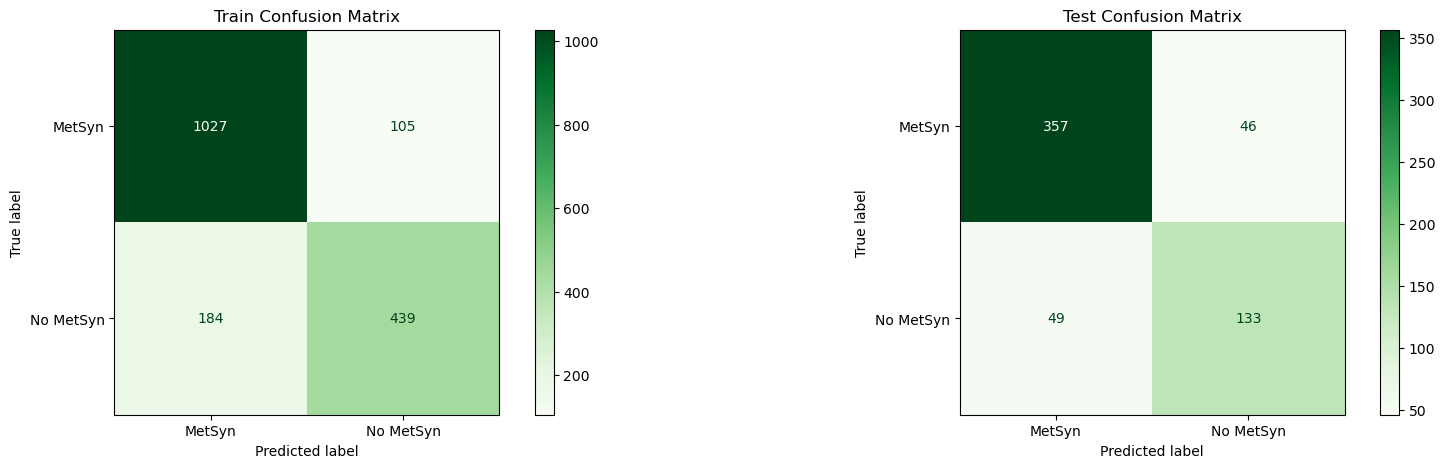

Train Accuracy  Train Recall  \
KNN Classifier                                 0.865527      0.840546   
KNN Best Model                                 0.853561      0.818279   
LightGBM Classifier                            1.000000      1.000000   
LightGBM best model                            1.000000      1.000000   
Gradient Boosting Classifier                   0.953276      0.946098   
GBC best model                                 0.999430      0.999558   
XGB Classifier                                 1.000000      1.000000   
XGB best model                                 1.000000      1.000000   
Logistic Regression Balanced                   0.825071      0.825786   
Logistic Regression UnderSampling              0.830769      0.829481   
Logistic Regression OverSampling               0.826781      0.826389   
Logistic Regression with PCA                   0.841026      0.813253   
Logistic Regression with PCA best model        0.835328      0.805949   

                                         Train Precision  Train F1-Score  \
KNN Classifier                                  0.861311        0.849103   
KNN Best Model                                  0.856852        0.831899   
LightGBM Classifier                             1.000000        1.000000   
LightGBM best model                             1.000000        1.000000   
Gradient Boosting Classifier                    0.951476        0.948684   
GBC best model                                  0.999199        0.999378   
XGB Classifier                                  1.000000        1.000000   
XGB best model                                  1.000000        1.000000   
Logistic Regression Balanced                    0.808843        0.814657   
Logistic Regression UnderSampling               0.814340        0.819961   
Logistic Regression OverSampling                0.810379        0.816097   
Logistic Regression with PCA                    0.833335        0.821382   
Logistic Regression with PCA best model         0.827522        0.814505   

                                         Test Accuracy  Test Recall  \
KNN Classifier                                0.820513     0.777827   
KNN Best Model                                0.817094     0.770826   
LightGBM Classifier                           0.904274     0.885324   
LightGBM best model                           0.907692     0.892325   
Gradient Boosting Classifier                  0.905983     0.880539   
GBC best model                                0.900855     0.884350   
XGB Classifier                                0.895726     0.874601   
XGB best model                                0.895726     0.874601   
Logistic Regression Balanced                  0.825641     0.826746   
Logistic Regression UnderSampling             0.822222     0.819745   
Logistic Regression OverSampling              0.829060     0.830734   
Logistic Regression with PCA                  0.835897     0.805565   
Logistic Regression with PCA best model       0.837607     0.808313   

                                         Test Precision  Test F1-Score  
KNN Classifier                                 0.794048       0.784912  
KNN Best Model                                 0.790988       0.779332  
LightGBM Classifier                            0.890111       0.887654  
LightGBM best model                            0.892325       0.892325  
Gradient Boosting Classifier                   0.897004       0.888075  
GBC best model                                 0.884350       0.884350  
XGB Classifier                                 0.880463       0.877434  
XGB best model                                 0.880463       0.877434  
Logistic Regression Balanced                   0.797390       0.807183  
Logistic Regression UnderSampling              0.793128       0.802468  
Logistic Regression OverSampling               0.801020       0.810963  
Logistic Regression with PCA                   0.809361       0.807407  
Logistic 

In [97]:
Grid_Search(logreg_pipe_pca,X_train, y_train, X_test, y_test, logreg_pipe_pca_params, 
            lbl = 'Logistic Regression with PCA best model')